<a href="https://colab.research.google.com/github/yecatstevir/farmer_market_food_insecurity/blob/main/predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predictive Modeling using Machine Learning
Questions we want to answer:
- Number of Farmers Markets needed to 


- Logistic Regression
- Random Forest
- XGBoost

In [ ]:
# Mount Google Drive to notebook
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [289]:
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [56]:
updated_df = pd.read_csv('/content/gdrive/MyDrive/FIS/updated_team20_clean_MM_FA_FM_county_202207231508.csv')
updated_df.loc[updated_df['count_FM'] > 0, 'If FM'] = 1
updated_df.loc[updated_df['count_FM'] <= 0, 'If FM'] = 0
updated_df.loc[updated_df['count_OFM'] > 0, 'If OFM'] = 1
updated_df.loc[updated_df['count_OFM'] <= 0, 'If OFM'] = 0
updated_df.loc[updated_df['count_CSA'] > 0, 'If CSA'] = 1
updated_df.loc[updated_df['count_CSA'] <= 0, 'If CSA'] = 0
updated_df['Total_Markets'] = updated_df['count_CSA'] + updated_df['count_OFM'] + updated_df['count_FM']
updated_df.loc[updated_df['Total_Markets'] > 0, 'If Any Market Type'] = 1
updated_df.loc[updated_df['Total_Markets'] <= 0, 'If Any Market Type'] = 0
updated_df = updated_df.dropna()

In [57]:
total_markets = updated_df['If Any Market Type'].sum()

In [58]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108 entries, 0 to 3141
Data columns (total 53 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          3108 non-null   int64  
 1   FIPS                                                                3108 non-null   int64  
 2   State                                                               3108 non-null   object 
 3   2019 Food Insecurity Rate                                           3108 non-null   float64
 4   # of Food Insecure Persons in 2019                                  3108 non-null   int64  
 5   Low Threshold in state                                              3108 non-null   int64  
 6   Low Threshold Type                                                  3108 non-null   object 
 7   High Threshold 

In [75]:
updated_df['prob_market'] = updated_df['Total_Markets'] / updated_df['Total_Markets'].sum()
updated_df['prob_market_fm'] = updated_df['count_FM'] / updated_df['count_FM'].sum()
#updated_df['prob_market'] = updated_df['prob_market']/total_markets

In [77]:
updated_df.loc[updated_df['County'] == 'Santa Clara County']

,Unnamed: 0,FIPS,State,2019 Food Insecurity Rate,# of Food Insecure Persons in 2019,Low Threshold in state,Low Threshold Type,High Threshold in state,High Threshold Type,2019 Child food insecurity rate,...,estimated_population,lat,long,If FM,If OFM,If CSA,Total_Markets,If Any Market Type,prob_market,prob_market_fm
228,228,6085,California,7.3,140120,200,"SNAP, Other Nutrition Programs",200,"SNAP, Other Nutrition Programs",6.5,...,1885508.0,37.220695,-121.69051,1.0,1.0,1.0,8.0,1.0,0.002219,0.00498


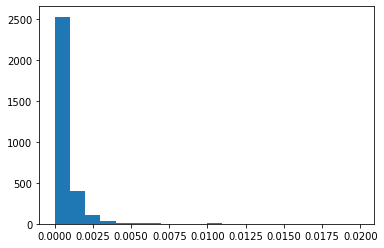

In [81]:
import matplotlib.pyplot as plt
plt.hist(updated_df['prob_market_fm'], bins = 20)
plt.show()

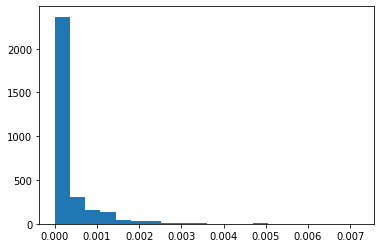

In [82]:
plt.hist(updated_df['prob_market'], bins = 20)
plt.show()

# Predict only FM

In [193]:
# If Any Market BOOL
# Prob Any Market
# Prob FM
# If have FM
# If have SOME LEVEL OF PARTICIPATION BENEFIT

col_to_keep = [
'If FM',
#'count_OFM',
#'count_SNAP_participation_OFM', 
#'count_FNAP_participation_OFM',
#'count_WIC_participation_OFM', 
#'count_SFMNP_participation_OFM',
#'count_CSA', 
#'count_SNAP_participation_CSA',
#'count_FNAP_participation_CSA', 
#'count_WIC_participation_CSA',
#'count_SFMNP_participation_CSA', 
#'count_FM',
#'count_SNAP_participation_FM', 
#'count_FNAP_participation_FM',
#'count_WIC_participation_FM', 
#'count_SFMNP_participation_FM',
'2019 Food Insecurity Rate',
'# of Food Insecure Persons in 2019', 
'Low Threshold in state',
#'Low Threshold Type', 
'High Threshold in state', 
#'High Threshold Type',
'2019 Child food insecurity rate',
'# of Food Insecure Children in 2019',
'% food insecure children in HH w/ HH incomes below 185 FPL in 2019',
'% food insecure children in HH w/ HH incomes above 185 FPL in 2019',
'2019 Cost Per Meal', 
'2019 Weighted Annual Food Budget Shortfall',
'P_FI_Below_Low_Threshold', 
'P_FI_Between_Thresholds',
'P_FI_Above_High_Threshold', 
'TractSNAP', 
'TractHUNV', 
'TractKids', 
'TractSeniors', 
'lahunvhalf',
'LALOWI05_10', 
'PovertyRate', 
'lalowihalf', 
'TractLOWI', 
'Urban',
'MedianFamilyIncome',
'estimated_population', 
'lat', 
'long'
] 

updated_df_col = updated_df[col_to_keep]

[0.01606287 0.03051486 0.05329883 0.         0.02325656 0.02688742
 0.01865766 0.02635159 0.02248177 0.11413208 0.02139941 0.02301033
 0.01609383 0.02764484 0.02526016 0.02806412 0.02685936 0.02432236
 0.02844422 0.02804659 0.0236005  0.02728163 0.17915335 0.03371638
 0.09299827 0.03808453 0.02437663]


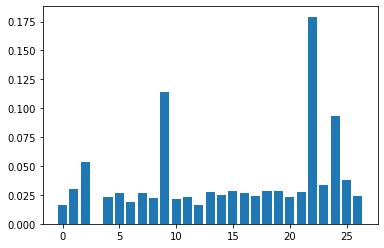

In [212]:
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import plot_importance



X = updated_df_col.iloc[:, 1:]
y = updated_df_col.iloc[0:,0]


# fit model no training data
model = XGBClassifier()
model.fit(X, y)
print(model.feature_importances_)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Figure size 576x576 with 0 Axes>

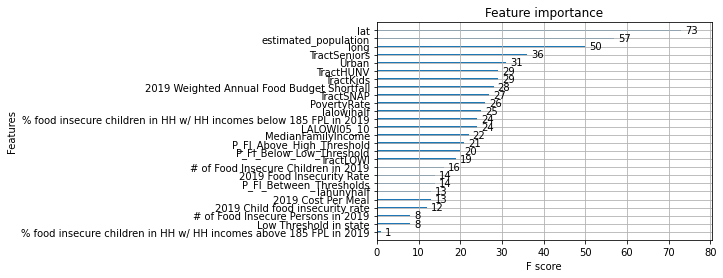

In [213]:
from xgboost import plot_importance
plt.figure(figsize = (8,8))
plot_importance(model)
plt.show()

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Cross Validation
scaler = StandardScaler()
X = scaler.fit_transform(X)

n = [10, 50, 100]
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators = n)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.393650 using {'learning_rate': 0.1, 'n_estimators': 50}
-0.692646 (0.000022) with: {'learning_rate': 0.0001, 'n_estimators': 10}
-0.690651 (0.000110) with: {'learning_rate': 0.0001, 'n_estimators': 50}
-0.688177 (0.000221) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.688175 (0.000221) with: {'learning_rate': 0.001, 'n_estimators': 10}
-0.669233 (0.001089) with: {'learning_rate': 0.001, 'n_estimators': 50}
-0.647551 (0.002139) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.647369 (0.002154) with: {'learning_rate': 0.01, 'n_estimators': 10}
-0.529159 (0.009435) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.457785 (0.015957) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.454773 (0.016391) with: {'learning_rate': 0.1, 'n_estimators': 10}
-0.393650 (0.030137) with: {'learning_rate': 0.1, 'n_estimators': 50}
-0.397123 (0.031962) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.406356 (0.025701) with: {'learning_rate': 0.2, 'n_estimators': 10}
-0.

In [222]:
# split data into X and y
X = updated_df_col.iloc[:, 1:]
Y = updated_df_col.iloc[0:,0]


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)* 100.0
print(f"Accuracy: {round(accuracy,2)}%")

Accuracy: 80.23%


In [275]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X)
updated_df['probs on whole fm'] = y_prob[:,1]
prob_whole_fm = updated_df.sort_values(by = 'probs on whole fm')[::-1]
prob_whole_fm[['County', 'State', 'probs on whole fm']].loc[prob_whole_fm['If FM'] == 0]

updated_df['probabilities_fm'] = updated_df.index.map(dict(zip(y_test.index, y_prob[:,1])))
prob_fm = updated_df[['probabilities_fm', 'County', 'State', 'If FM']].dropna().sort_values(by = 'probabilities_fm')[::-1]
prob_fm.loc[prob_fm['If FM'] == 0]

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       485
         1.0       0.62      0.27      0.38       137

    accuracy                           0.80       622
   macro avg       0.72      0.61      0.63       622
weighted avg       0.78      0.80      0.77       622



,County,State,probs on whole fm
1775,Bergen County,New Jersey,0.927096
1748,Clark County,Nevada,0.848678
547,Honolulu County,Hawaii,0.823929
1777,Camden County,New Jersey,0.766589
1870,Richmond County,New York,0.751278
...,...,...,...
2746,Throckmorton County,Texas,0.003543
2753,Upton County,Texas,0.003468
2545,Briscoe County,Texas,0.003360
2609,Glasscock County,Texas,0.003197


# Predict Any Market

In [277]:
# If Any Market BOOL
# Prob Any Market
# Prob FM
# If have FM
# If have SOME LEVEL OF PARTICIPATION BENEFIT

col_to_keep = [
'If Any Market Type',
#'count_OFM',
#'count_SNAP_participation_OFM', 
#'count_FNAP_participation_OFM',
#'count_WIC_participation_OFM', 
#'count_SFMNP_participation_OFM',
#'count_CSA', 
#'count_SNAP_participation_CSA',
#'count_FNAP_participation_CSA', 
#'count_WIC_participation_CSA',
#'count_SFMNP_participation_CSA', 
#'count_FM',
#'count_SNAP_participation_FM', 
#'count_FNAP_participation_FM',
#'count_WIC_participation_FM', 
#'count_SFMNP_participation_FM',
'2019 Food Insecurity Rate',
'# of Food Insecure Persons in 2019', 
'Low Threshold in state',
#'Low Threshold Type', 
'High Threshold in state', 
#'High Threshold Type',
'2019 Child food insecurity rate',
'# of Food Insecure Children in 2019',
'% food insecure children in HH w/ HH incomes below 185 FPL in 2019',
'% food insecure children in HH w/ HH incomes above 185 FPL in 2019',
'2019 Cost Per Meal', 
'2019 Weighted Annual Food Budget Shortfall',
'P_FI_Below_Low_Threshold', 
'P_FI_Between_Thresholds',
'P_FI_Above_High_Threshold', 
'TractSNAP', 
'TractHUNV', 
'TractKids', 
'TractSeniors', 
'lahunvhalf',
'LALOWI05_10', 
'PovertyRate', 
'lalowihalf', 
'TractLOWI', 
'Urban',
'MedianFamilyIncome',
'estimated_population', 
'lat', 
'long'
] 

updated_df_col = updated_df[col_to_keep]

[0.02870857 0.01819525 0.04374683 0.         0.02782948 0.01624901
 0.01670986 0.02460522 0.02485554 0.03687439 0.01869545 0.01936883
 0.02549376 0.01672934 0.02431083 0.0175987  0.02403204 0.01757407
 0.0217099  0.02206047 0.01920644 0.02751077 0.11671829 0.03078077
 0.2797301  0.05036656 0.0303394 ]


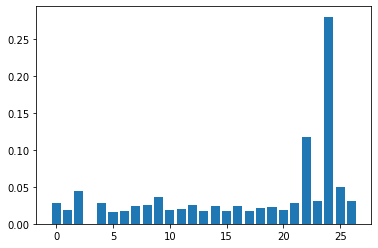

In [278]:
X = updated_df_col.iloc[:, 1:]
y = updated_df_col.iloc[0:,0]


# fit model no training data
model = XGBClassifier()
model.fit(X, y)
print(model.feature_importances_)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Figure size 576x576 with 0 Axes>

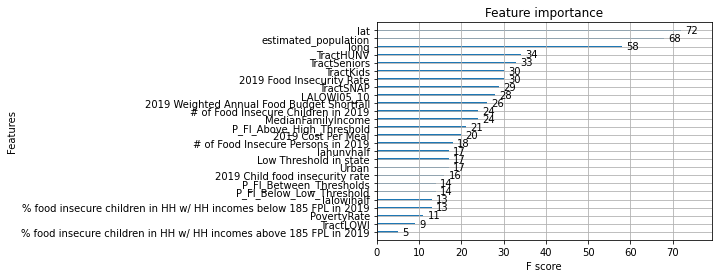

In [280]:
from xgboost import plot_importance
plt.figure(figsize = (8,8))
plot_importance(model)
plt.show()

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Cross Validation
scaler = StandardScaler()
X = scaler.fit_transform(X)

n = [10, 50, 100]
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators = n)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.490887 using {'learning_rate': 0.1, 'n_estimators': 100}
-0.692828 (0.000017) with: {'learning_rate': 0.0001, 'n_estimators': 10}
-0.691558 (0.000085) with: {'learning_rate': 0.0001, 'n_estimators': 50}
-0.689986 (0.000170) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.689985 (0.000171) with: {'learning_rate': 0.001, 'n_estimators': 10}
-0.677924 (0.000779) with: {'learning_rate': 0.001, 'n_estimators': 50}
-0.664159 (0.001512) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.664064 (0.001521) with: {'learning_rate': 0.01, 'n_estimators': 10}
-0.588597 (0.006565) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.541740 (0.011188) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.539807 (0.011697) with: {'learning_rate': 0.1, 'n_estimators': 10}
-0.491189 (0.024276) with: {'learning_rate': 0.1, 'n_estimators': 50}
-0.490887 (0.026788) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.504725 (0.017795) with: {'learning_rate': 0.2, 'n_estimators': 10}
-0

In [282]:
# split data into X and y
X = updated_df_col.iloc[:, 1:]
Y = updated_df_col.iloc[0:,0]


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.85%


In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X)

updated_df['probabilities_any_market'] = updated_df.index.map(dict(zip(y_test.index, y_prob[:,1])))
prob_fm = updated_df[['probabilities_any_market', 'County', 'State', 'If Any Market Type']].dropna().sort_values(by = 'probabilities_any_market')[::-1]
prob_fm.loc[prob_fm['If Any Market Type'] == 0]

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79       318
         1.0       0.81      0.68      0.74       304

    accuracy                           0.77       622
   macro avg       0.78      0.77      0.77       622
weighted avg       0.77      0.77      0.77       622



,probabilities_any_market,County,State,If Any Market Type
418,0.982771,Clinch County,Georgia,0.0
1054,0.979651,Larue County,Kentucky,0.0
2,0.976046,Barbour County,Alabama,0.0
2191,0.975831,Pittsburg County,Oklahoma,0.0
1402,0.975296,Alcorn County,Mississippi,0.0
...,...,...,...,...
98,0.032487,Coconino County,Arizona,0.0
772,0.032334,Steuben County,Indiana,0.0
2820,0.026163,Accomack County,Virginia,0.0
2074,0.025560,Hancock County,Ohio,0.0


# Any Market probability

In [292]:
col_to_keep = [
'prob_market',
#'count_OFM',
#'count_SNAP_participation_OFM', 
#'count_FNAP_participation_OFM',
#'count_WIC_participation_OFM', 
#'count_SFMNP_participation_OFM',
#'count_CSA', 
#'count_SNAP_participation_CSA',
#'count_FNAP_participation_CSA', 
#'count_WIC_participation_CSA',
#'count_SFMNP_participation_CSA', 
#'count_FM',
#'count_SNAP_participation_FM', 
#'count_FNAP_participation_FM',
#'count_WIC_participation_FM', 
#'count_SFMNP_participation_FM',
'2019 Food Insecurity Rate',
'# of Food Insecure Persons in 2019', 
'Low Threshold in state',
#'Low Threshold Type', 
'High Threshold in state', 
#'High Threshold Type',
'2019 Child food insecurity rate',
'# of Food Insecure Children in 2019',
'% food insecure children in HH w/ HH incomes below 185 FPL in 2019',
'% food insecure children in HH w/ HH incomes above 185 FPL in 2019',
'2019 Cost Per Meal', 
'2019 Weighted Annual Food Budget Shortfall',
'P_FI_Below_Low_Threshold', 
'P_FI_Between_Thresholds',
'P_FI_Above_High_Threshold', 
'TractSNAP', 
'TractHUNV', 
'TractKids', 
'TractSeniors', 
'lahunvhalf',
'LALOWI05_10', 
'PovertyRate', 
'lalowihalf', 
'TractLOWI', 
'Urban',
'MedianFamilyIncome',
'estimated_population', 
'lat', 
'long'
] 

updated_df_col = updated_df[col_to_keep]

In [298]:
y

0       0.000000
1       0.001109
2       0.000000
3       0.000000
4       0.000832
          ...   
3137    0.000000
3138    0.000000
3139    0.000000
3140    0.000000
3141    0.000277
Name: prob_market, Length: 3108, dtype: float64

[06:54:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.02159008 0.0535626  0.06105177 0.         0.03662765 0.01731422
 0.01137751 0.         0.04256076 0.03560356 0.         0.
 0.03461089 0.04395274 0.         0.04510737 0.03122697 0.03148177
 0.0724678  0.03484444 0.01429998 0.         0.0903234  0.09299665
 0.11601387 0.06877777 0.0442082 ]


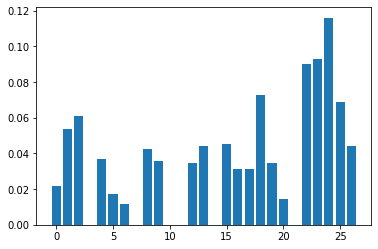

In [294]:
X = updated_df_col.iloc[:, 1:]
y = updated_df_col.iloc[0:,0]


# fit model no training data
model = XGBRegressor()
model.fit(X, y)
print(model.feature_importances_)

# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Figure size 576x576 with 0 Axes>

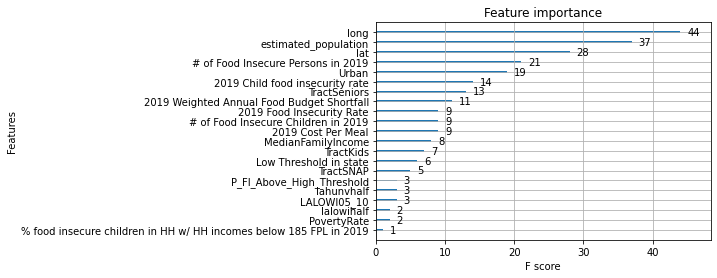

In [295]:
from xgboost import plot_importance
plt.figure(figsize = (8,8))
plot_importance(model)
plt.show()

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Cross Validation
scaler = StandardScaler()
X = scaler.fit_transform(X)

n = [10, 50, 100]
model = XGBRegressor()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators = n)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: ignored

In [302]:
y

0       0.000000
1       0.001109
2       0.000000
3       0.000000
4       0.000832
          ...   
3137    0.000000
3138    0.000000
3139    0.000000
3140    0.000000
3141    0.000277
Name: prob_market, Length: 3108, dtype: float64

In [306]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = XGBRegressor(n_estimators = 50, ets = 0.1)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 0.003 (0.000)


In [308]:
# split data into X and y
X = updated_df_col.iloc[:, 1:]
Y = updated_df_col.iloc[0:,0]


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

# fit model on all training data
model = XGBRegressor(n_estimators = 50, ets = 0.1)
model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
print(y_pred)

[07:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.0028187  0.00274035 0.00317514 0.00297308 0.00274035 0.00274035
 0.00274917 0.00274035 0.00274035 0.0028187  0.00297308 0.00274035
 0.003535   0.00274035 0.00274035 0.00274035 0.00309506 0.00274035
 0.00378364 0.00274917 0.00274035 0.00274035 0.00297308 0.00276098
 0.00274035 0.00291103 0.00274035 0.00274035 0.00369143 0.00274917
 0.00298637 0.00274035 0.00378364 0.00274035 0.00286919 0.00274035
 0.00354412 0.00274035 0.00274917 0.0028187  0.00457588 0.00339726
 0.00309506 0.00274035 0.00309506 0.00277615 0.00274035 0.00297308
 0.00274035 0.00274035 0.00274035 0.00286496 0.00274035 0.00282672
 0.0035826  0.00274035 0.00274035 0.00274035 0.00274917 0.00286919
 0.00298253 0.00286055 0.00339726 0.00300047 0.00274917 0.00276098
 0.00291103 0.0028187  0.00303301 0.00326973 0.00291103 0.00309688
 0.00274035 0.00286055 0.00274035 0.00274035 0.00286055 0.00274035
 0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
y_prob = model.predict_proba(X)

updated_df['probabilities_any_market'] = updated_df.index.map(dict(zip(y_test.index, y_prob[:,1])))
prob_fm = updated_df[['probabilities_any_market', 'County', 'State', 'If Any Market Type']].dropna().sort_values(by = 'probabilities_any_market')[::-1]
prob_fm.loc[prob_fm['If Any Market Type'] == 0]